# Case study on unsupervised learning
Try out different clustering models in the given dataset. Find the optimum number of clusters in each model and create the model with optimum number of clusters. Also learn about dB scan clustering and implement it

In [1]:
#importlibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data set
data=pd.read_csv(r"C:\Users\user\Downloads\wine_clust.csv")

In [3]:
#return dataframe with few rows
data.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
#statistical summary of data
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
#shape of data
data.shape

(178, 13)

In [7]:
#check for datatypes
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [8]:
#check for colums
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [9]:
#check for null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# kmeans 

In [10]:
from sklearn.cluster import KMeans


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

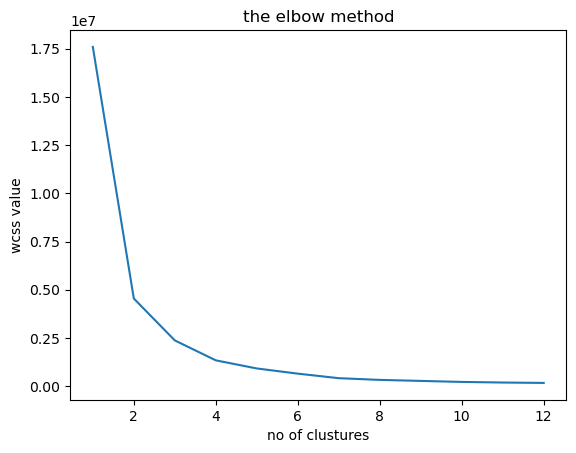

In [11]:
#elbow method
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)    
plt.title('the elbow method') 
plt.xlabel('no of clustures')
plt.ylabel('wcss value')
plt.show

In [12]:
#select clusture as 3
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)

In [13]:
y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [14]:
#silhouette score

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
sil_avg=silhouette_score(data,y_kmeans)

In [17]:
print('silhouette score ',sil_avg)

silhouette score  0.571138193786884


# agglomerative clustering

In [18]:
import scipy.cluster.hierarchy as sch

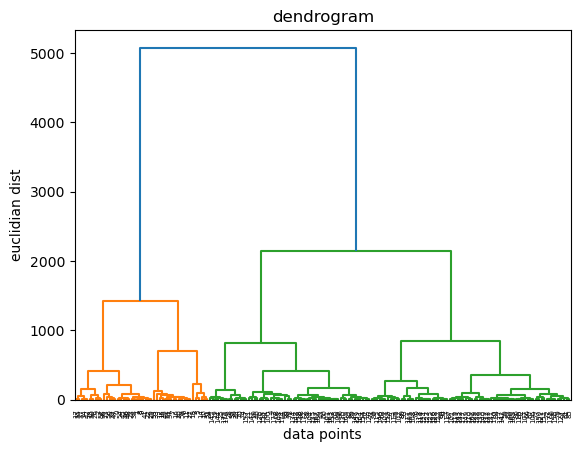

In [19]:
#dendrogram
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidian dist')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data)

In [22]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [23]:
sil_avg1=silhouette_score(data,y_hc)

In [24]:
print('silhouette score ',sil_avg1)

silhouette score  0.6587292996216912


# DBSCAN clustering(density based clustering)

In [25]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=20, min_samples=5).fit(data)



In [26]:
c=cluster.labels_
c


array([-1,  0, -1, -1,  3, -1,  1,  1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
       -1, -1,  2, -1, -1,  0,  0,  2,  2, -1,  1, -1,  0,  1, -1, -1, -1,
       -1, -1,  2, -1,  0, -1, -1,  0, -1,  3,  2,  0,  0, -1,  0,  1, -1,
        1, -1, -1,  0, -1, -1,  1,  1,  4,  3,  4,  3,  4,  5,  3,  4,  4,
        3, -1,  2,  4,  4, -1,  2,  4,  4,  4, -1,  4, -1,  3,  3,  4,  4,
        4,  4,  3,  3,  3,  4,  4,  4, -1,  5, -1, -1,  4,  3,  4,  3,  3,
        4,  4,  3, -1,  4,  4, -1,  3,  3, -1,  3,  4,  4,  4,  4,  5,  4,
        3,  3,  4,  5,  4,  4,  4,  5,  4,  5,  3, -1,  4,  3,  3,  3,  3,
        3,  4,  3,  3,  3, -1,  4,  3,  2,  2,  4,  3,  3,  3, -1, -1, -1,
        3,  3,  3,  4,  2,  3,  3,  4,  3,  3,  3,  3,  4,  3,  3,  3,  3,
        4,  4,  3,  3,  3,  2,  2,  3], dtype=int64)

In [27]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(c)) - (1 if -1 in c else 0)

In [28]:
n_clusters_

6

In [29]:
sil_avg2=silhouette_score(data,c)
sil_avg2

0.2019757987409921

In [30]:
#DECIDING OPTIMAL VALUE FOR EPSILON

In [31]:
from sklearn.neighbors import NearestNeighbors

In [32]:
neigh=NearestNeighbors(n_neighbors=2)

In [33]:
nbrs=neigh.fit(data)

In [34]:
distances,indices = nbrs.kneighbors(data)

In [35]:
distances

array([[  0.        ,  10.3928052 ],
       [  0.        ,   6.78638343],
       [  0.        ,  12.2969915 ],
       [  0.        ,  30.09196903],
       [  0.        ,  17.72868015],
       [  0.        ,  30.09196903],
       [  0.        ,   6.23935093],
       [  0.        ,  15.3305512 ],
       [  0.        ,   3.27007645],
       [  0.        ,   3.27007645],
       [  0.        ,   5.41997232],
       [  0.        ,   5.29867908],
       [  0.        ,  25.17260018],
       [  0.        ,   2.94961014],
       [  0.        ,  33.05906986],
       [  0.        ,  17.67303596],
       [  0.        ,  13.47668728],
       [  0.        ,  10.1335137 ],
       [  0.        , 133.22215582],
       [  0.        ,   9.59942186],
       [  0.        ,  17.51458535],
       [  0.        ,  16.7830897 ],
       [  0.        ,   5.18481437],
       [  0.        ,   6.3684535 ],
       [  0.        ,  16.612098  ],
       [  0.        ,  11.14076748],
       [  0.        ,  13.16761937],
 

In [36]:
indices

array([[  0,  54],
       [  1,   8],
       [  2,  52],
       [  3,   5],
       [  4,  68],
       [  5,   3],
       [  6,  27],
       [  7,  16],
       [  8,   9],
       [  9,   8],
       [ 10,  31],
       [ 11,  27],
       [ 12,  15],
       [ 13,  50],
       [ 14,  31],
       [ 15,   7],
       [ 16,  58],
       [ 17,  55],
       [ 18,  14],
       [ 19, 176],
       [ 20,  40],
       [ 21, 141],
       [ 22,  29],
       [ 23,  38],
       [ 24, 145],
       [ 25, 175],
       [ 26,   2],
       [ 27,  11],
       [ 28,  35],
       [ 29,  22],
       [ 30,  58],
       [ 31,  10],
       [ 32,  47],
       [ 33,  49],
       [ 34,  42],
       [ 35,  28],
       [ 36,  44],
       [ 37,  42],
       [ 38,  23],
       [ 39,  78],
       [ 40,  20],
       [ 41,  29],
       [ 42,  34],
       [ 43,  60],
       [ 44,  36],
       [ 45,  34],
       [ 46,  48],
       [ 47,  32],
       [ 48,  46],
       [ 49,  57],
       [ 50,  13],
       [ 51,  57],
       [ 52,

In [37]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]

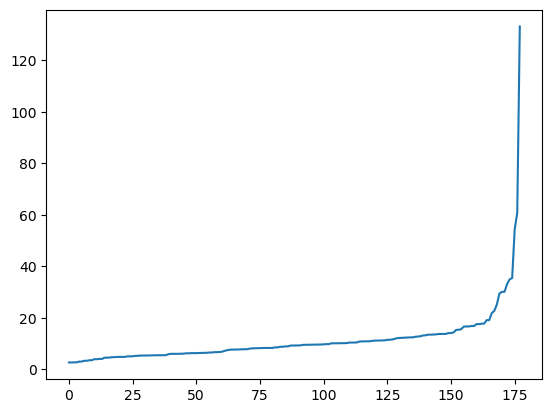

In [38]:
plt.plot(distances)

In [39]:
cluster = DBSCAN(eps=40, min_samples=6).fit(data)


In [40]:
c=cluster.labels_



In [41]:
sil_avg3=silhouette_score(data,c)

In [42]:
sil_avg3

0.5336262747425518

# PCA

In [43]:
#check shape of data
data.shape

(178, 13)

In [44]:
#standard scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scalar=StandardScaler()

In [47]:
scaled_data=scalar.fit_transform(data)


In [48]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [49]:
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)

In [50]:
scaled_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [51]:
from sklearn.decomposition import PCA

In [52]:
pca=PCA(n_components=0.97)
pca.fit(data)

PCA(n_components=0.97)

In [53]:
x_pca=pca.transform(data)

In [54]:
x_pca.shape

(178, 1)

In [55]:
x_pca

array([[ 318.56297929],
       [ 303.09741966],
       [ 438.06113292],
       [ 733.24013935],
       [ -11.5714285 ],
       [ 703.23119174],
       [ 542.97158087],
       [ 548.40185984],
       [ 298.0368628 ],
       [ 298.04955314],
       [ 763.07971194],
       [ 532.94322773],
       [ 572.83441039],
       [ 402.92535829],
       [ 800.05339386],
       [ 563.245578  ],
       [ 533.37965064],
       [ 383.31759108],
       [ 933.1183875 ],
       [  98.40317748],
       [  33.593594  ],
       [  23.14643754],
       [ 288.09303022],
       [ 267.98151253],
       [  98.01988577],
       [  83.49874396],
       [ 447.92559622],
       [ 537.91916502],
       [ 168.2104676 ],
       [ 288.00824708],
       [ 538.0264521 ],
       [ 768.09293886],
       [ 243.1507509 ],
       [ 488.60128005],
       [ 348.231007  ],
       [ 173.07995743],
       [ 133.28642355],
       [ 358.01855918],
       [ 273.04443152],
       [  13.64300211],
       [  48.42964225],
       [ 287.884

In [56]:
data_pca=pd.DataFrame(x_pca)

In [57]:
data_pca.shape

(178, 1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

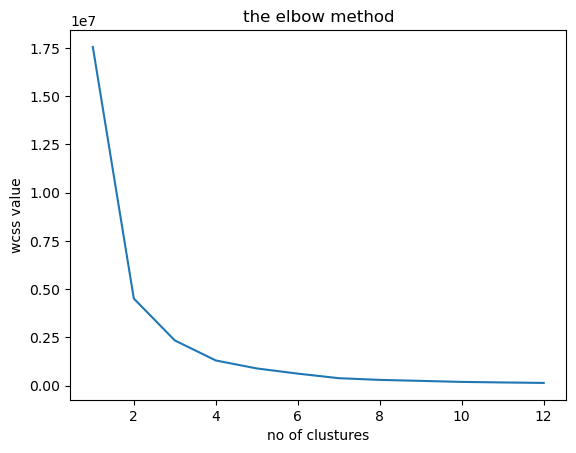

In [58]:
# pca kmeans#elbow method
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)    
plt.title('the elbow method') 
plt.xlabel('no of clustures')
plt.ylabel('wcss value')
plt.show



In [59]:
#select clusture as 3
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans3=kmeans.fit_predict(data_pca)

In [60]:
y_kmeans3

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [61]:
sil_avg3=silhouette_score(data,y_kmeans3)

In [62]:
print('silhouette score ',sil_avg3)

silhouette score  0.571138193786884


In [63]:
# DIMENSIONALITY REDUCTION HAS NO EFFECT

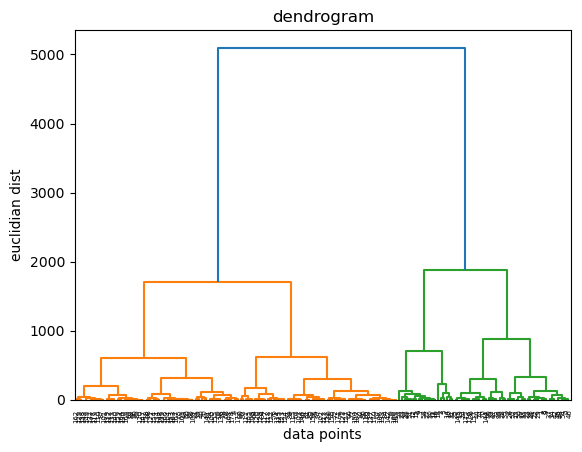

In [64]:
endrogram=sch.dendrogram(sch.linkage(data_pca,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidian dist')
plt.show()

In [65]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data_pca)

In [66]:
sil_avg2=silhouette_score(data_pca,y_hc)
sil_avg2

0.653245953941322

In [67]:
#dbscan after dimensionality reduction

In [68]:
cluster = DBSCAN(eps=40, min_samples=6).fit(data_pca)


In [69]:
c=cluster.labels_


In [70]:
sil_avg3=silhouette_score(data_pca,c)

In [71]:
sil_avg3

0.5451262427129375

In [72]:
#dimensionality reduction does not have any chande on k means and very small effect on dbscan and agglomerative clustering